In [1]:
import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zillow = wrangle.zillow_data()

In [6]:
zillow.head()

# zillow.shape

# zillow.info()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [4]:
zillow.isnull().sum()

Unnamed: 0                          0
bedroomcnt                       2945
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

There appeared to be a few ten thousand rows but it only made up around 1.5% of the data so I decided that it was easier to just 

In [5]:
zillow.describe()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.985217e+06,2.982272e+06,2.982260e+06,2.940120e+06,2.950951e+06,2.937384e+06,2.962465e+06,2.982285e+06
mean,1.492608e+06,3.093362e+00,2.216196e+00,1.831455e+03,4.435279e+05,1.964438e+03,5.408949e+03,6.048053e+03
std,8.617581e+05,1.271569e+00,1.078250e+00,1.954198e+03,8.163366e+05,2.364428e+01,9.675567e+03,2.024082e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,2.400000e-01,6.037000e+03
25%,7.463040e+05,2.000000e+00,2.000000e+00,1.215000e+03,1.882200e+05,1.950000e+03,2.468620e+03,6.037000e+03
50%,1.492608e+06,3.000000e+00,2.000000e+00,1.574000e+03,3.211610e+05,1.963000e+03,4.007620e+03,6.037000e+03
75%,2.238912e+06,4.000000e+00,3.000000e+00,2.140000e+03,5.140720e+05,1.981000e+03,6.230500e+03,6.059000e+03
max,2.985216e+06,2.500000e+01,3.200000e+01,9.525760e+05,3.196225e+08,2.016000e+03,3.823176e+06,6.111000e+03


Distribution of bedroomcnt


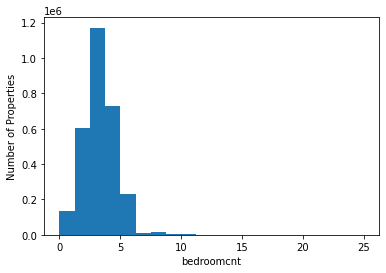

Distribution of bathroomcnt


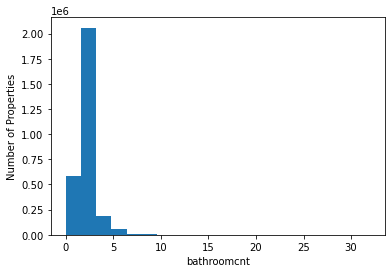

Distribution of yearbuilt


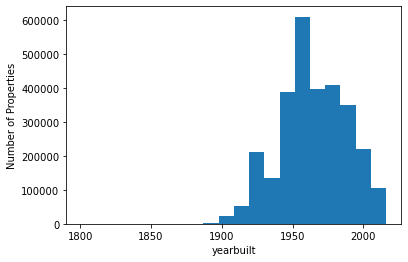

Distribution of cheap


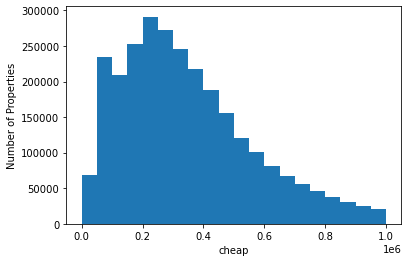

Distribution of size


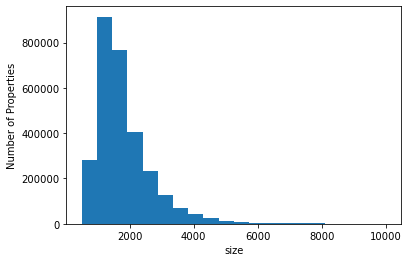

Distribution of taxes


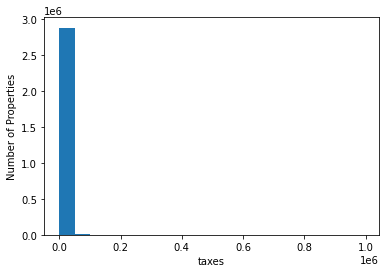

In [49]:
vars = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'cheap', 'size', 'taxes']

special_vars = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']

def hist_chart(zillow, var):
   
    print ('Distribution of ' + var)
    zillow[var].hist(bins=20)
    plt.grid(False)
    plt.xlabel(var)
    plt.ylabel('Number of Properties')
    plt.show()

for var in vars:
    hist_chart(zillow, var)

In [21]:
zillow = zillow.dropna()

In [30]:
zillow.taxvaluedollarcnt.mean()

444828.1677893724

In [38]:
zillow['cheap'] = np.where(zillow['taxvaluedollarcnt'] <= 1_000_000, zillow['taxvaluedollarcnt'], np.nan) 

In [36]:
zillow.calculatedfinishedsquarefeet.mean()

1836.4794318791917

In [37]:
zillow['size'] = np.where((zillow['calculatedfinishedsquarefeet'] > 500) & (zillow['calculatedfinishedsquarefeet'] < 10000), zillow['calculatedfinishedsquarefeet'], zillow.calculatedfinishedsquarefeet.mean()) 

In [45]:
zillow.taxamount.min(), zillow.taxamount.max(), zillow.taxamount.mean()

(5.04, 3458861.12, 5456.144079340298)

In [48]:
zillow['taxes'] = np.where((zillow['taxamount'] > 500) & (zillow['taxamount'] < 1_000_000), zillow['taxamount'], np.nan) 

In [52]:
zillow.fips.value_counts()

6037.0    1970806
6059.0     717971
6111.0     213141
Name: fips, dtype: int64

In [ ]:
zillow['norm_bed'] = np.where((zillow['taxamount'] > 500) & (zillow['taxamount'] < 1_000_000), zillow['taxamount'], np.nan) 

In [53]:
zillow[zillow.calculatedfinishedsquarefeet < 10_000].shape[0] / zillow.shape[0]

0.9986726020514708